Decision Tree

In [1]:
#acess to drive documents

try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/Data Mining I Project'
except ImportError as e:
    pass

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Data Mining I Project


In [2]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
import tensorflow_hub as hub

In [4]:
#loading the data

IMDB_review_dataset = pd.read_csv('IMDB Dataset.csv')

In [5]:
#see the first records

IMDB_review_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
#numerical information about dataset

IMDB_review_dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
#drop duplicates

IMDB_review_dataset.drop_duplicates(inplace = True)

In [8]:
#checking for positive values

IMDB_review_dataset[IMDB_review_dataset["sentiment"]== "positive"]


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [9]:
#checking for negative values

IMDB_review_dataset[IMDB_review_dataset["sentiment"]== "negative"]


,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
imbalance = 24884 - 24698
print (imbalance)

186


In [11]:
#dataset is imbalance, there are 186 more positive values than negative values

Positive_values = IMDB_review_dataset[IMDB_review_dataset["sentiment"]== "positive"]
Negative_values = IMDB_review_dataset[IMDB_review_dataset["sentiment"]== "negative"]

#balance dataset by dropping 186 positive values

Positive_values = Positive_values.iloc[186: , :]
IMDB_review_dataset = pd.concat([Positive_values,Negative_values], ignore_index=True)
IMDB_review_dataset.sample(frac=1).reset_index(drop=True)


#Check for balance

print(IMDB_review_dataset["sentiment"].value_counts())

positive    24698
negative    24698
Name: sentiment, dtype: int64


In [12]:
#remove HTML tags

IMDB_review_dataset.iloc[16569]
IMDB_review_dataset.iloc[10808]
IMDB_review_dataset.iloc[6610]
IMDB_review_dataset.iloc[20822]

review       Well, I guess I'm emotionally attached to this...
sentiment                                             positive
Name: 20822, dtype: object

In [13]:
IMDB_review_dataset[IMDB_review_dataset['review'].str.contains(r'<[^<>]*>') == True]

,review,sentiment
0,Goldeneye will always go down as one of thee m...,positive
2,"""Hey Babu Riba"" is a film about a young woman,...",positive
4,What can you say about the film White Fire. Am...,positive
5,If you are interested in learning more about t...,positive
6,"Gamers: DR is not a fancy made movie, it's mor...",positive
...,...,...
49390,Robert Colomb has two full-time jobs. He's kno...,negative
49391,This is your typical junk comedy.<br /><br />T...,negative
49392,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49393,I am a Catholic taught in parochial elementary...,negative


In [14]:
IMDB_review_dataset['review'] = IMDB_review_dataset['review'].str.replace(r'<[^<>]*>', '', regex=True)

In [15]:
IMDB_dataset_sampled = IMDB_review_dataset.sample(20_000)
df = IMDB_review_dataset
print(IMDB_dataset_sampled["sentiment"].value_counts())

negative    10030
positive     9970
Name: sentiment, dtype: int64


In [16]:
print(IMDB_review_dataset["sentiment"].value_counts())

positive    24698
negative    24698
Name: sentiment, dtype: int64


In [17]:
#Preprocessing

from sklearn.preprocessing import LabelEncoder

#drop the target variable

target_variable = IMDB_review_dataset['sentiment']
dataset = IMDB_review_dataset.copy()
dataset.drop(columns='sentiment')

target_variable.head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

In [18]:
#transform target variable into binary values

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
target_variable = label_encoder.fit_transform(target_variable)
target_variable

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
#Using Bag-of-Word to vectorize the text document (TF-IDF vectorizer)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=False, min_df=0.00009)

matrix = tfidfVectorizer.fit_transform(dataset['review'])

dataset_tfidfVectorized = pd.DataFrame(matrix.toarray(), columns=tfidfVectorizer.get_feature_names())
display(dataset_tfidfVectorized)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,001,007,00am,00pm,00s,01,02,03,...,zudina,zula,zulu,zuniga,zurer,zwart,zwick,élan,émigré,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Eventually stop word removal 
#vectorizer = TfidfVectorizer(stop_words='english')

#matrix = vectorizer.fit_transform(dataset['review'])

#features = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
#display(features)

In [21]:
#Eventually using stemming

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

import re, string

token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace

def tokenize(text):
    my_stopwords = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    stems = []
    
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
stem_vectorizer = TfidfVectorizer(tokenizer=tokenize)
matrix = stem_vectorizer.fit_transform(dataset['review'])

features = pd.DataFrame(matrix.toarray(), columns=stem_vectorizer.get_feature_names_out())
display(features)

,00,000,00000000000,0000000000001,00000001,00001,00015,000dm,001,003830,...,ünel,ünfaith,üvegtigri,üzümcü,ýs,þorleifsson,þór,żmijewski,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Split dataset into training and test data

from sklearn.model_selection import train_test_split     

#using the holdout method: training data : test data = 80 : 20; representative since dataset is balanced (otherwise try to use cross validation)

data_train, data_test, target_train, target_test = train_test_split(
    dataset_tfidfVectorized, target_variable,test_size=0.2, random_state=42, stratify=target_variable)

In [24]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DecisionTree_Classifier = DecisionTreeClassifier(random_state=0)

params = {'max_depth' : [10,15,20],
          'min_samples_leaf' : [2,3,5],
}

#Hyperparametertuning by using Gridsearch

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=DecisionTree_Classifier,
                          param_grid=params,
                          cv = 4,
                          n_jobs = 1, verbose = 1, scoring = "accuracy")

grid_search.fit(data_train, target_train)

print(grid_search.best_score_)

Best_DecisionTree = grid_search.best_estimator_
Best_DecisionTree

Fitting 4 folds for each of 9 candidates, totalling 36 fits
0.7287680939366332


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=0)

In [30]:
#Decision Tree after Hyperparameter Tuning        

DecisionTree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state = 0)
DecisionTree.fit(dataset_tfidfVectorized, target_variable)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=0)

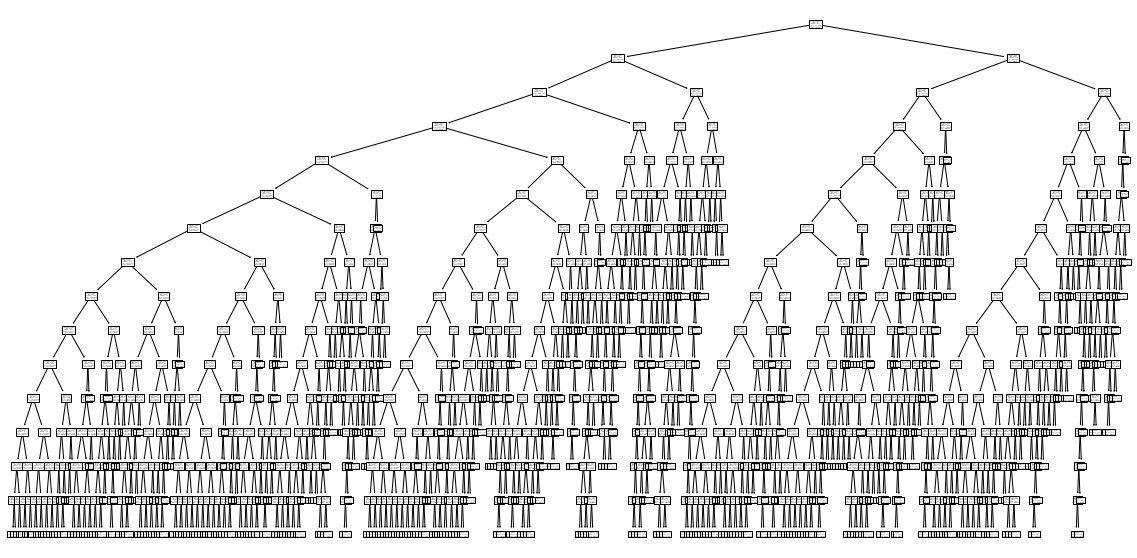

In [35]:
#Visualizing Tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(DecisionTree,
               feature_names=dataset_tfidfVectorized.columns, 
               class_names=label_encoder.classes_)
plt.show()

In [36]:
#Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

IMDB_prediction = DecisionTree.predict(data_test)
print("Accuracy: {}".format(accuracy_score(target_test, IMDB_prediction)))


Accuracy: 0.8011133603238867


In [37]:
# Confusion Matrix

import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.show()

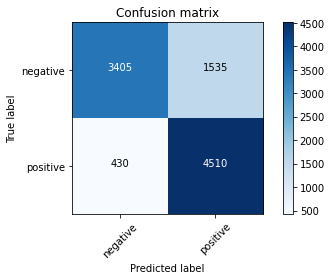

In [38]:
cnf_matrix = confusion_matrix(target_test, IMDB_prediction)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_)